In [51]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
from PIL import Image
plt.rcParams['figure.figsize'] = [16, 16]

In [3]:
with h5py.File('/media/rapid/lfvishead.h5', 'r') as h5_file:
    all_images = h5_file['images']
    print(all_images.shape)
    data = h5_file['images'][1860]
    print(data.shape)
    mean = h5_file['mean'][:]
    var = h5_file['var'][:]
    scale = h5_file['scale'][:]

(2000, 64, 4, 256, 256)
(64, 4, 256, 256)


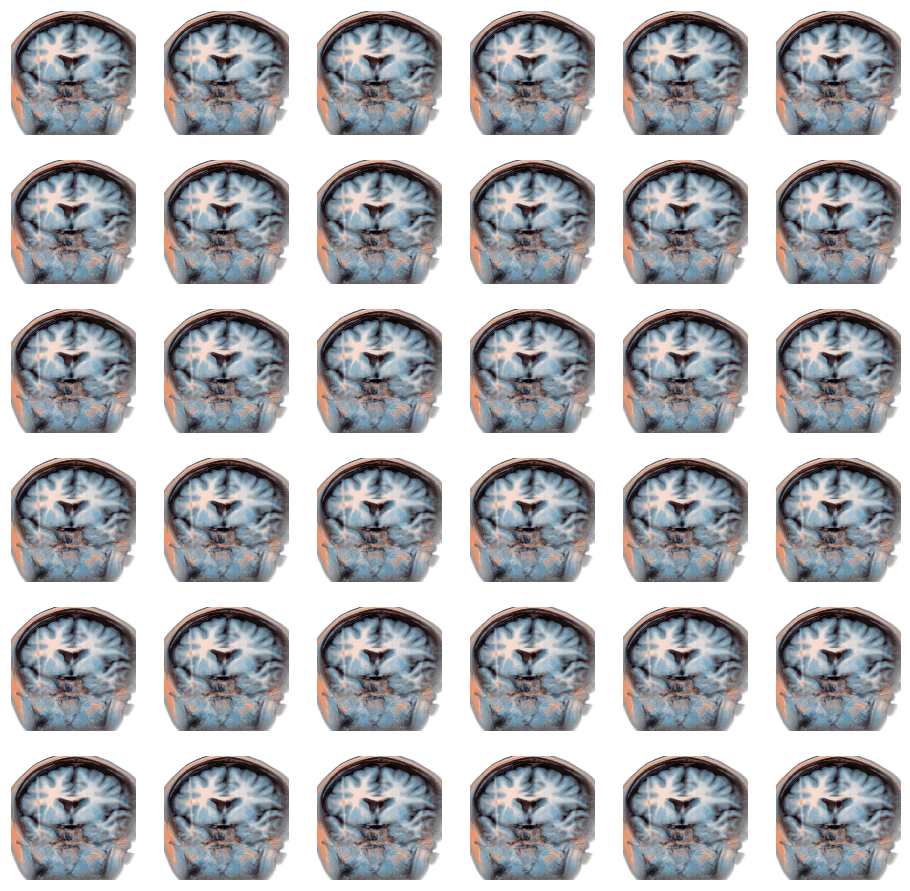

In [6]:
f, axes = plt.subplots(6, 6)
for y, row_axis in enumerate(axes):
    for x, col_axis in enumerate(row_axis):
        image = data[(y * 8) + x]
        image = np.moveaxis(image, -3, -1)
        col_axis.imshow(image)
        col_axis.axis('off')
        col_axis.get_xaxis().set_visible(False)
        col_axis.get_yaxis().set_visible(False)
plt.show()

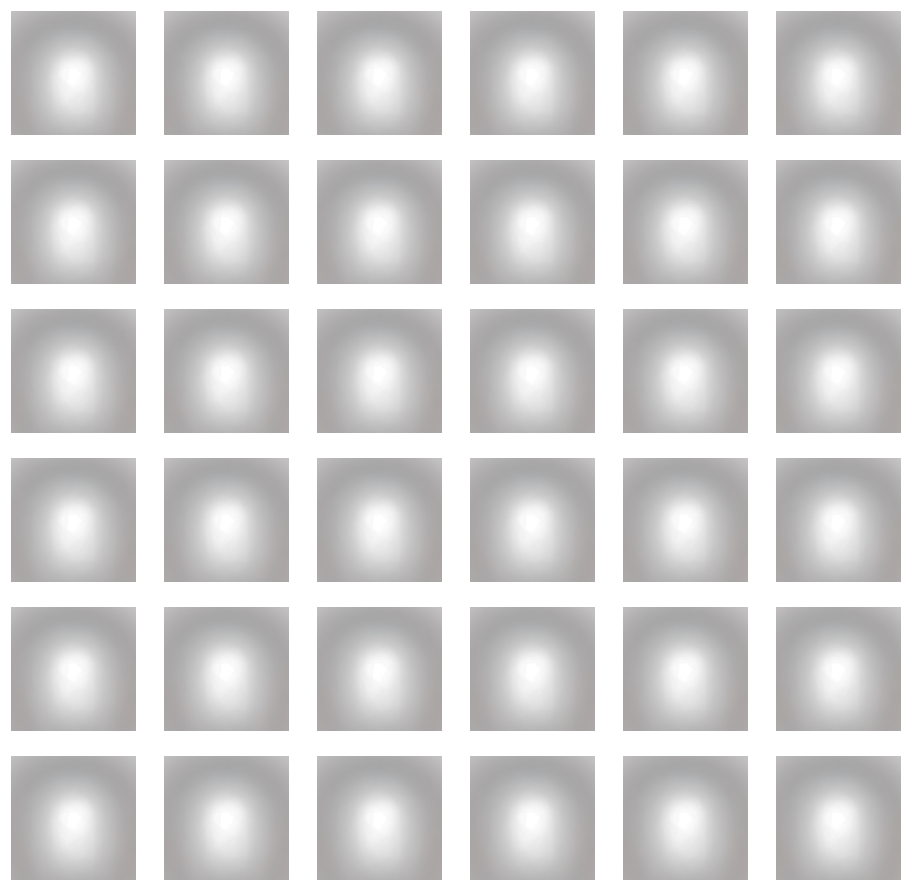

In [7]:
f, axes = plt.subplots(6, 6)
for y, row_axis in enumerate(axes):
    for x, col_axis in enumerate(row_axis):
        image = np.sqrt(var[(y * 8) + x]).astype(np.uint8)
        image = np.moveaxis(image, -3, -1)
        col_axis.imshow(image)
        col_axis.axis('off')
        col_axis.get_xaxis().set_visible(False)
        col_axis.get_yaxis().set_visible(False)
plt.show()

In [142]:
test_num = 1860
y_pred_images = np.load('/media/bulk/data/deeplfvis_results/mrihead/basenetfulllfsmall/y_pred_images.npy')
base_net_image = np.moveaxis(y_pred_images[test_num - 1600], -3, -1)
del y_pred_images

y_pred_images = np.load('/media/bulk/data/deeplfvis_results/mrihead/basenetfulllfsmallrank/y_pred_images.npy')
base_net_rank_image = np.moveaxis(y_pred_images[test_num - 1600], -3, -1)
del y_pred_images

y_pred_images = np.load('/media/bulk/data/deeplfvis_results/mrihead/basenetfulllfsmallrankentropy/y_pred_images.npy')
base_net_rank_entropy_image = np.moveaxis(y_pred_images[test_num - 1600], -3, -1)
del y_pred_images

In [198]:
test_num = 1789

In [200]:
y_pred_images = np.load('/media/bulk/data/deeplfvis_results/lfsubclavia/basenetfulllfsmall/y_pred_images.npy')
base_net_image = np.moveaxis(y_pred_images[test_num - 1600], -3, -1)
del y_pred_images

y_pred_images = np.load('/media/bulk/data/deeplfvis_results/lfsubclavia/basenetfulllfsmallrank/y_pred_images.npy')
base_net_rank_image = np.moveaxis(y_pred_images[test_num - 1600], -3, -1)
del y_pred_images

y_pred_images = np.load('/media/bulk/data/deeplfvis_results/lfsubclavia/basenetfulllfsmallrankentropy/y_pred_images.npy')
base_net_rank_entropy_image = np.moveaxis(y_pred_images[test_num - 1600], -3, -1)
del y_pred_images

In [201]:
def get_uv_33(result_light_field):
    start = 76  
    stop = 80  # Corresponds to (u, v) of (3, 3)
    return result_light_field[:, :, start:stop]

In [202]:
base_net_image_33 = get_uv_33(base_net_image)
base_net_rank_image_33 = get_uv_33(base_net_rank_image)
base_net_rank_entropy_image_33 = get_uv_33(base_net_rank_entropy_image)

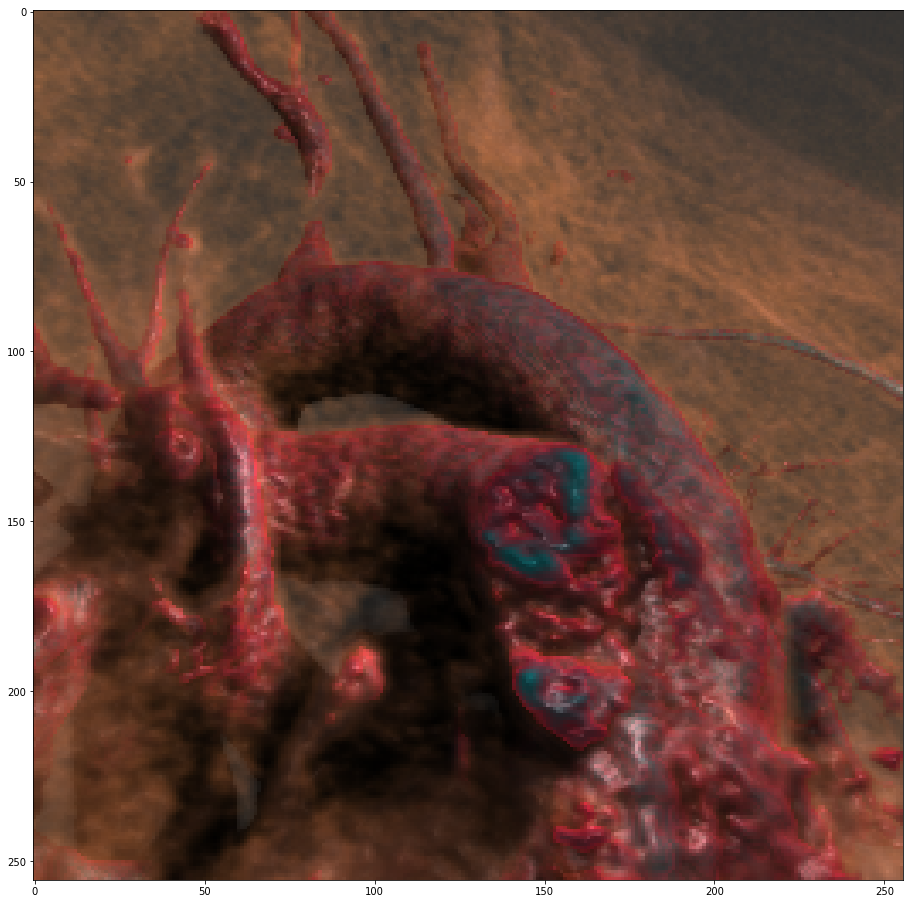

In [203]:
with h5py.File('/media/rapid/lfsubclavia.h5', 'r') as h5_file:
    all_images = h5_file['images']
    gt_image = np.moveaxis(all_images[test_num, (3 * 8) + 3], -3, -1)
    plt.imshow(gt_image)

In [204]:
def get_errors(gt_image, test_image):
    errors =  np.abs(test_image.astype(np.float) - gt_image.astype(np.float))
    return np.mean(errors.astype(np.uint8), -1)

In [205]:
get_errors(gt_image, gt_image)
base_net_errors = get_errors(gt_image, base_net_image_33)
base_net_rank_errors = get_errors(gt_image, base_net_rank_image_33)
base_net_rank_entropy_errors = get_errors(gt_image, base_net_rank_entropy_image_33)

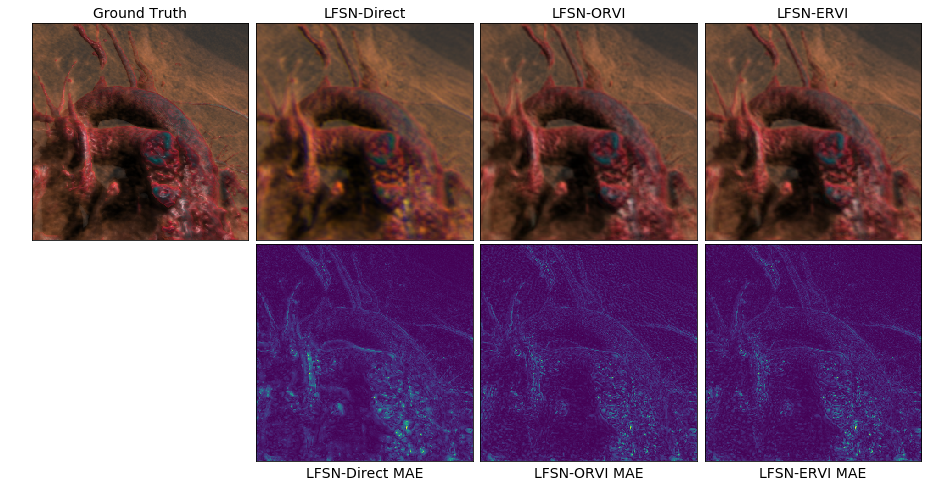

In [206]:
f, axes = plt.subplots(2, 4, gridspec_kw= {'wspace': 0.02, 'hspace': 0.02})

axes[0, 0].imshow(gt_image)
axes[0, 0].set_title("Ground Truth", fontsize=14)
axes[0, 0].get_xaxis().set_visible(False)
axes[0, 0].get_yaxis().set_visible(False)

axes[0, 1].imshow(base_net_image_33)
axes[0, 1].set_title("LFSN-Direct", fontsize=14)
axes[0, 1].get_xaxis().set_visible(False)
axes[0, 1].get_yaxis().set_visible(False)

axes[0, 2].imshow(base_net_rank_image_33)
axes[0, 2].set_title("LFSN-ORVI", fontsize=14)
axes[0, 2].get_xaxis().set_visible(False)
axes[0, 2].get_yaxis().set_visible(False)

axes[0, 3].imshow(base_net_rank_entropy_image_33)
axes[0, 3].set_title("LFSN-ERVI", fontsize=14)
axes[0, 3].get_xaxis().set_visible(False)
axes[0, 3].get_yaxis().set_visible(False)

axes[1, 0].axis('off')

axes[1, 1].imshow(base_net_errors)
axes[1, 1].set_title("LFSN-Direct MAE", y=-0.1, fontsize=14)
axes[1, 1].get_xaxis().set_visible(False)
axes[1, 1].get_yaxis().set_visible(False)

axes[1, 2].imshow(base_net_rank_errors)
axes[1, 2].set_title("LFSN-ORVI MAE", y=-0.1, fontsize=14)
axes[1, 2].get_xaxis().set_visible(False)
axes[1, 2].get_yaxis().set_visible(False)

axes[1, 3].imshow(base_net_rank_entropy_errors)
axes[1, 3].set_title("LFSN-ERVI MAE", y=-0.1, fontsize=14)
axes[1, 3].get_xaxis().set_visible(False)
axes[1, 3].get_yaxis().set_visible(False)

plt.subplots_adjust(wspace=0.025, hspace=0.0, bottom=0.5)
plt.show()

In [209]:
with h5py.File('/media/rapid/lfsubclavia.h5', 'r') as h5_file:
    timings = h5_file['timing'][1600:]
    print(timings.shape)

(400, 64)


In [212]:
timings_reshaped = np.reshape(timings, (400, 8, 8))
print(timings_reshaped.shape)
timings_trimmed = timings_reshaped[:, :6, :6]
print(timings_trimmed.shape)

(400, 8, 8)
(400, 6, 6)


In [213]:
top_left_timing = timings_trimmed[:, 0, 0]
top_right_timing = timings_trimmed[:, 5, 0]
bottom_left_timing = timings_trimmed[:, 0, 5]
bottom_right_timing = timings_trimmed[:, 5, 5]

In [214]:
total_timing_landmarks = top_left_timing + top_right_timing + bottom_left_timing + bottom_right_timing

In [216]:
total_timing_landmarks_mean = np.mean(total_timing_landmarks)
total_timing_landmarks_std = np.std(total_timing_landmarks)
print(total_timing_landmarks_mean)
print(total_timing_landmarks_std)

0.07990112006664277
0.025561530866917218


In [221]:
total_timings_rows = np.sum(timings_trimmed, -1)
print(total_timings_rows.shape)
total_timings = np.sum(total_timings_rows, -1)
print(total_timings.shape)

(400, 6)
(400,)


In [223]:
total_timing_mean = np.mean(total_timings)
total_timing_std = np.std(total_timings)
print(total_timing_mean)
print(total_timing_std)

0.7155337351560592
0.22267307144371704
